In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
upoladed = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

os.environ["KAGGLE_KEY"] = "63c3fdd7d4058251d2c83a40c51e6572"
os.environ["KAGGLE_USERNAME"]= "novfi071"

!kaggle datasets list

ref                                                                  title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance                 Student Habits vs Academic Performance               19512  2025-04-12 10:49:08.663000          10638        187  1.0              
zahidmughal2343/global-cancer-patients-2015-2024                     global_cancer_patients_2015_2024                   1261049  2025-04-14 00:05:23.367000           2751         37  1.0              
adilshamim8/student-depression-dataset                               Student Depression Dataset                          467020  2025-03-13 03:12:30.423000          24844        369  1.0          

In [ ]:
!kaggle datasets download -d bhuviranga/mini-dog-breed-identification


Dataset URL: https://www.kaggle.com/datasets/bhuviranga/mini-dog-breed-identification
License(s): other


In [ ]:
!unzip mini-dog-breed-identification.zip


Archive:  mini-dog-breed-identification.zip
  inflating: Mini Dog Breed Data/saint_bernard/039bdddd8546f0fafdf984b810d1138b.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/03b0e7ace52c10dc4878f60307cdebe3.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/09a1ea62ffa4b9389c03162bb0b0b572.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/14e9a6d002632db71a18283fc024f086.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/16265434d841173019be215bea5d8097.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/215fb2b75397fe9010c35fe84f2a07b2.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/28f673b778e6f4cb974dc332fcb1ee1d.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/2be75da18d88312d50c6237ce86786d8.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/2f4a4f7881b5bcee285cd7a09fcbf0d7.jpg  
  inflating: Mini Dog Breed Data/saint_bernard/33bac6585e1091787fb37e3bd769984a.jpg  
  inflatin

In [ ]:
import os

dataset_path = 'Mini Dog Breed Data'

dataset_files = os.listdir(dataset_path)
print("Files in the dataset:", dataset_files)


Files in the dataset: ['silky_terrier', 'saint_bernard', 'yorkshire_terrier', 'siberian_husky', 'scottish_deerhound']


Found 477 files belonging to 5 classes.
Using 382 files for training.
Found 477 files belonging to 5 classes.
Using 95 files for validation.

Class names: ['saint_bernard', 'scottish_deerhound', 'siberian_husky', 'silky_terrier', 'yorkshire_terrier']


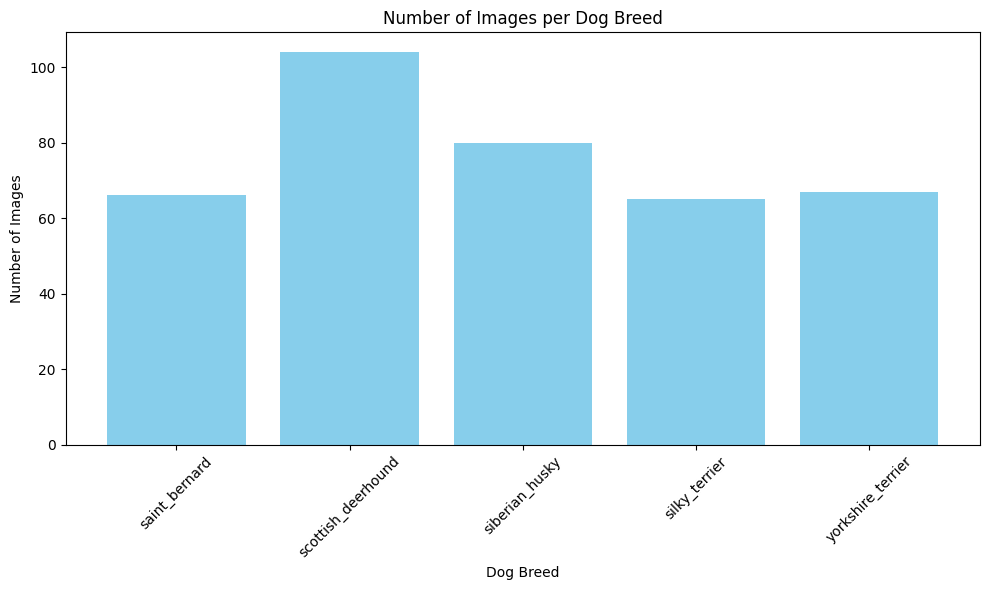

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset_from_directory
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dog_breed_data_path = dataset_path

train_dataset = image_dataset_from_directory(dog_breed_data_path, image_size=(128, 128), batch_size=32, validation_split=0.2, subset="training", seed=123)
val_dataset = image_dataset_from_directory(dog_breed_data_path, image_size=(128, 128), batch_size=32, validation_split=0.2, subset="validation", seed=123)

class_names = train_dataset.class_names
print("\nClass names:", class_names)

class_counts = [0] * len(class_names)
for _, labels in train_dataset.unbatch():
    class_counts[int(labels.numpy())] += 1

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Dog Breed")
plt.ylabel("Number of Images")
plt.title("Number of Images per Dog Breed")
plt.tight_layout()
plt.show()


In [ ]:
normalization_layer = keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vgg_base.trainable = False

model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

logs = model.fit(train_dataset, epochs=5, validation_data=val_dataset)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 94s 8s/step - accuracy: 0.2312 - loss: 1.7716 - val_accuracy: 0.3158 - val_loss: 1.5764
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 148s 8s/step - accuracy: 0.3637 - loss: 1.4823 - val_accuracy: 0.4842 - val_loss: 1.4312
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 140s 8s/step - accuracy: 0.3970 - loss: 1.4112 - val_accuracy: 0.4421 - val_loss: 1.3822
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 142s 8s/step - accuracy: 0.5123 - loss: 1.2645 - val_accuracy: 0.5684 - val_loss: 1.2873
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.5699 - loss: 1.1552 - val_accuracy: 0.6000 - val_loss: 1.2465


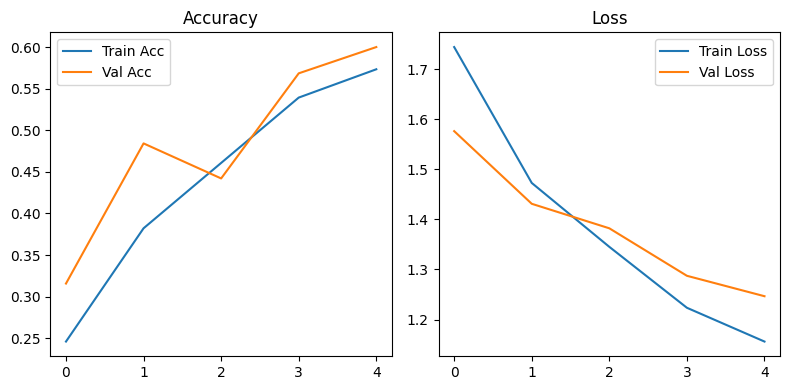

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.history['accuracy'], label='Train Acc')
plt.plot(logs.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(logs.history['loss'], label='Train Loss')
plt.plot(logs.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
res = model.evaluate(val_dataset)
print(f"\nTest Accuracy: {res[1]:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.6008 - loss: 1.2830

Test Accuracy: 0.6000


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


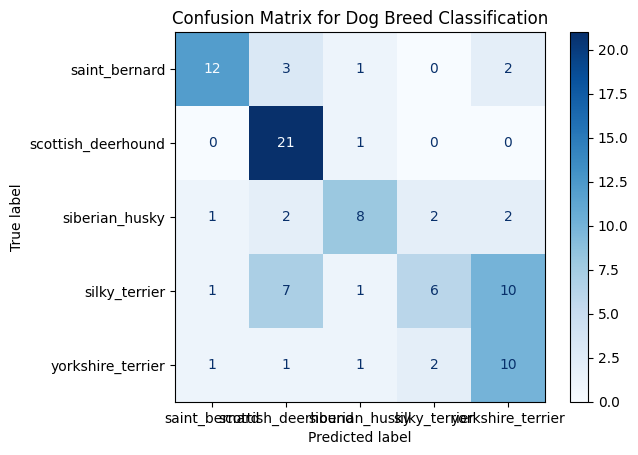

<Figure size 640x480 with 0 Axes>

In [ ]:
y_true = []
y_pred = []
for images, labels in val_dataset:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dog Breed Classification")
plt.show()
plt.tight_layout()

In [ ]:
model.save("dog_breed_classifier.h5")
print("Model saved as dog_breed_classifier.h5")


Model saved as dog_breed_classifier.h5


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("dog_breed_classifier.h5")
print("Model loaded successfully")


Model loaded successfully


In [ ]:
res_loaded = loaded_model.evaluate(val_dataset)
print(f"\nLoaded Model Accuracy: {res_loaded[1]:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.6359 - loss: 1.2101

Loaded Model Accuracy: 0.6000


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = os.path.join(dog_breed_data_path, class_names[0], os.listdir(os.path.join(dog_breed_data_path, class_names[0]))[0])

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

pred = loaded_model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
Predicted Class: saint_bernard
